In [38]:
import pandas as pd #for data manupilation and reading csv

In [39]:
data = pd.read_csv('Link.csv') #reading the csv file

## Data exploration and manupilation

In [40]:
data.head() #let's see first five rows

,date,open,high,low,close,Volume LINK,Volume USDT,tradecount
0,11/30/2020 0:00,13.3855,14.4370,13.3855,14.2677,10302701.22,1.442793e+08,225033
1,11/29/2020 0:00,13.0848,13.4765,12.8408,13.3800,6551088.54,8.610524e+07,130452
2,11/28/2020 0:00,12.5038,13.4300,12.3489,13.0853,7286264.48,9.427717e+07,147521
3,11/27/2020 0:00,12.6036,12.9530,11.9454,12.4989,9129104.44,1.132071e+08,231521
4,11/26/2020 0:00,14.2180,14.4743,11.2939,12.6030,24596535.81,3.072793e+08,524048


In [41]:
data.info() #get an overview of the datatypes and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         685 non-null    object 
 1   open         685 non-null    float64
 2   high         685 non-null    float64
 3   low          685 non-null    float64
 4   close        685 non-null    float64
 5   Volume LINK  685 non-null    float64
 6   Volume USDT  685 non-null    float64
 7   tradecount   685 non-null    int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 42.9+ KB


In [42]:
data.describe()

,open,high,low,close,Volume LINK,Volume USDT,tradecount
count,685.000000,685.000000,685.000000,685.000000,6.850000e+02,6.850000e+02,685.000000
mean,4.185139,4.408169,3.967515,4.205262,7.960302e+06,4.482641e+07,83032.240876
std,4.141907,4.380142,3.901095,4.157775,8.131162e+06,6.739884e+07,100533.470600
min,0.385000,0.406500,0.000100,0.383200,2.254300e+05,9.566022e+04,911.000000
25%,1.767700,1.846200,1.676700,1.767700,2.633054e+06,4.898382e+06,15192.000000
50%,2.602000,2.710400,2.458900,2.605500,5.572563e+06,1.536579e+07,41180.000000
75%,4.420700,4.582600,4.286400,4.424300,1.073464e+07,5.737018e+07,126208.000000
max,19.210800,20.111100,18.514400,19.228500,7.363434e+07,5.272770e+08,681520.000000


In [43]:
data['date'] = pd.to_datetime(data['date']) #changing the datatype of date to datetime will make analysis easy

In [44]:
data = data.sort_values('date') #sort the data w.r.t date

In [45]:
data.head() #check the sorted data once

,date,open,high,low,close,Volume LINK,Volume USDT,tradecount
684,2019-01-16,0.5355,0.5355,0.4668,0.4895,1343660.31,665013.6444,3492
683,2019-01-17,0.4895,0.4953,0.4639,0.4756,1411725.35,673447.2086,3987
682,2019-01-18,0.4762,0.5112,0.4601,0.4894,984417.59,474999.2862,5662
681,2019-01-19,0.4908,0.5000,0.4673,0.4831,735443.20,354090.0410,4482
680,2019-01-20,0.4803,0.4920,0.4590,0.4834,677499.56,323333.5538,2098


In [46]:
weekly = data.groupby(pd.Grouper(key = 'date', freq = 'W-MON')).first().reset_index() #using grouper function of pandas we group the data weekly

In [47]:
weekly.head()

,date,open,high,low,close,Volume LINK,Volume USDT,tradecount
0,2019-01-21,0.5355,0.5355,0.4668,0.4895,1343660.31,6.650136e+05,3492
1,2019-01-28,0.4960,0.5656,0.4956,0.5344,1784953.50,9.555139e+05,4972
2,2019-02-04,0.4104,0.4638,0.4061,0.4505,5190825.37,2.252400e+06,10723
3,2019-02-11,0.3926,0.4327,0.3902,0.4224,1299107.03,5.323411e+05,3411
4,2019-02-18,0.4277,0.4374,0.4176,0.4277,941303.58,4.006688e+05,2718


In [48]:
import matplotlib.pyplot as plt

In [49]:
import seaborn as sns

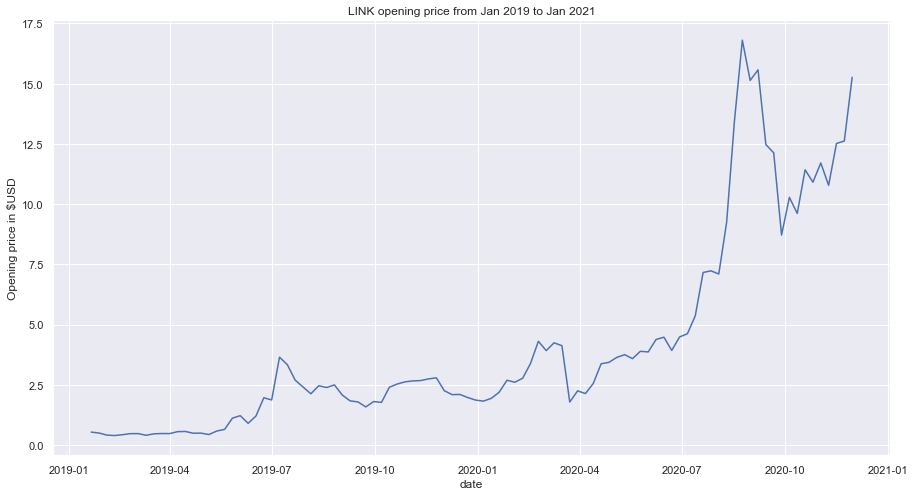

In [50]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
ax1 = sns.lineplot(x='date',y ='open', data = weekly)
ax1.set_ylabel('Opening price in $USD')
ax1.set_title('LINK opening price from Jan 2019 to Jan 2021')
plt.show()

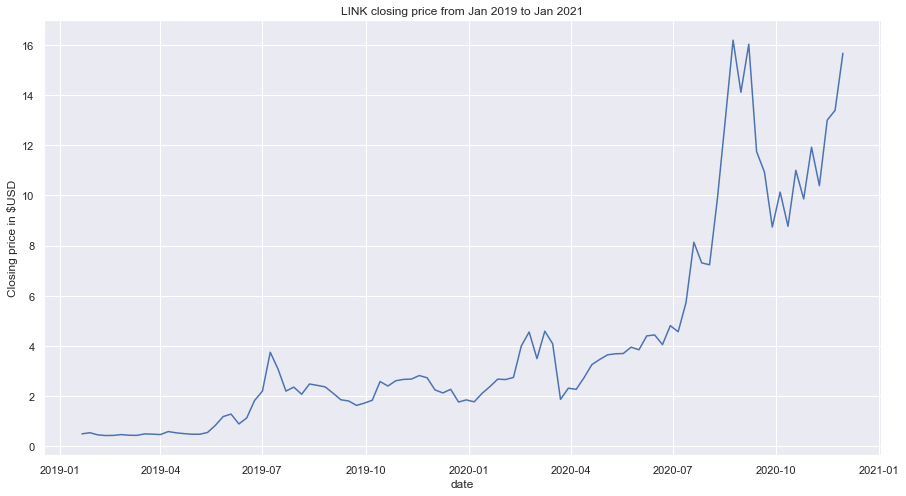

In [51]:
sns.set_theme()
plt.figure(figsize=(15,8))
ax2 = sns.lineplot(x='date',y ='close', data = weekly)
ax2.set_ylabel('Closing price in $USD')
ax2.set_title('LINK closing price from Jan 2019 to Jan 2021')
plt.show()

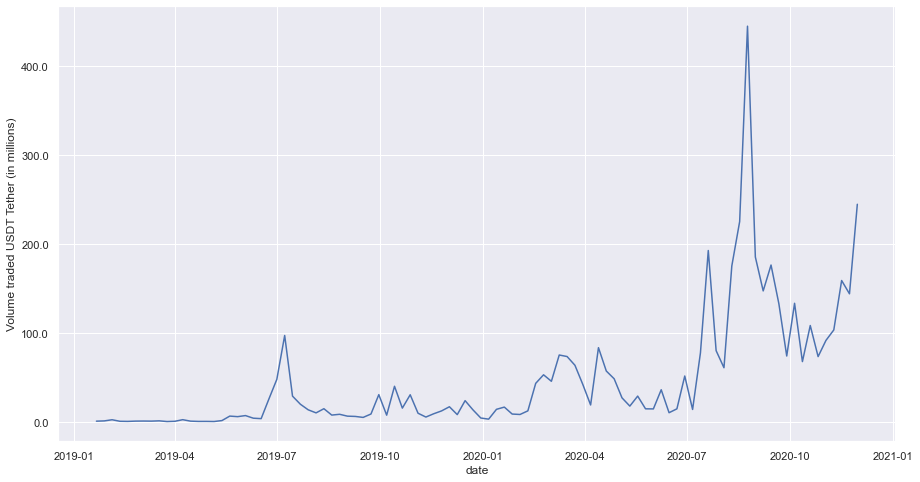

In [52]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
ax3 = sns.lineplot(x='date',y ='Volume USDT', data = weekly)
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos): #modify the y scale from scientific values to millions scale
    return f'{x / 1000000}'
ax3.yaxis.set_major_formatter(FuncFormatter(millions_formatter))
ax3.set_ylabel('Volume traded USDT Tether (in millions)')
plt.show()

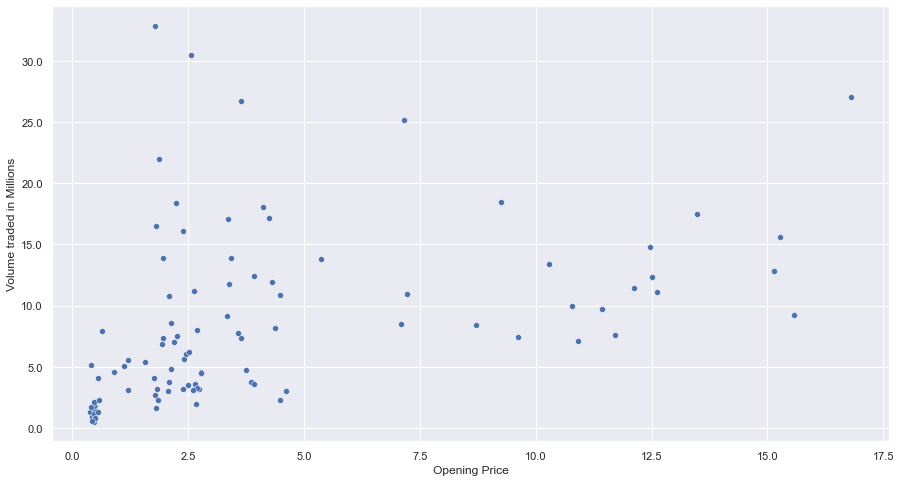

In [53]:
sns.set_style('darkgrid')
plt.figure(figsize = (15,8))
ax4 = sns.scatterplot(x='open',y ='Volume LINK' ,data = weekly)
from matplotlib.ticker import FuncFormatter
def millions_formatter(x, pos):
    return f'{x / 1000000}'
ax4.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

ax4.set_ylabel('Volume traded in Millions')
ax4.set_xlabel('Opening Price')
plt.show()

In [54]:
data = data.groupby([pd.Grouper(key='date', freq='D')]).first().reset_index() #for timeseries prediction analysis get the original data grouped by day

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         685 non-null    datetime64[ns]
 1   open         685 non-null    float64       
 2   high         685 non-null    float64       
 3   low          685 non-null    float64       
 4   close        685 non-null    float64       
 5   Volume LINK  685 non-null    float64       
 6   Volume USDT  685 non-null    float64       
 7   tradecount   685 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 42.9 KB


## Predicting using LSTM

In [56]:
data = data.set_index('date')
data = data[['open']]

In [57]:
data

,open
date,
2019-01-16,0.5355
2019-01-17,0.4895
2019-01-18,0.4762
2019-01-19,0.4908
2019-01-20,0.4803
...,...
2020-11-26,14.2180
2020-11-27,12.6036
2020-11-28,12.5038


In [58]:
split_date = '2020-05-27'#estimation of date to split train and test data in 75:25 ratio
data_train = data.loc[data.index <= split_date].copy() #date less than split date for training data
data_test = data.loc[data.index > split_date].copy()# date greater than split date for testing data

In [59]:
data_train

,open
date,
2019-01-16,0.5355
2019-01-17,0.4895
2019-01-18,0.4762
2019-01-19,0.4908
2019-01-20,0.4803
...,...
2020-05-23,4.0620
2020-05-24,3.9242
2020-05-25,3.7878


In [60]:
data_test

,open
date,
2020-05-28,3.8542
2020-05-29,4.0462
2020-05-30,3.9820
2020-05-31,4.1780
2020-06-01,4.1278
...,...
2020-11-26,14.2180
2020-11-27,12.6036
2020-11-28,12.5038


In [61]:
#data preprocessing 
import numpy as np
training_set = data_train.values #will return 2D array of values in training data
from sklearn.preprocessing import MinMaxScaler # to scale the data from 0-1
sc = MinMaxScaler()
training_set = sc.fit_transform(training_set)
X_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
X_train = np.reshape(X_train, (len(X_train), 1, 1))

In [62]:
training_set

array([[0.03476232],
       [0.02413729],
       [0.02106527],
       [0.02443757],
       [0.02201229],
       [0.02284381],
       [0.02563866],
       [0.03446205],
       [0.02762508],
       [0.02727861],
       [0.02046473],
       [0.01873239],
       [0.01062503],
       [0.00586686],
       [0.01512912],
       [0.00923916],
       [0.        ],
       [0.00722964],
       [0.00739132],
       [0.00251767],
       [0.00175544],
       [0.00863861],
       [0.00346468],
       [0.00394974],
       [0.012034  ],
       [0.01843212],
       [0.01489814],
       [0.0098628 ],
       [0.0098628 ],
       [0.01321199],
       [0.00889269],
       [0.01191851],
       [0.01238047],
       [0.01766988],
       [0.01986418],
       [0.01612233],
       [0.01771608],
       [0.01358156],
       [0.01455167],
       [0.01713863],
       [0.00455028],
       [0.02014136],
       [0.01120248],
       [0.0097935 ],
       [0.00891579],
       [0.01007068],
       [0.00882339],
       [0.008

In [63]:
X_train

array([[[0.03476232]],

       [[0.02413729]],

       [[0.02106527]],

       [[0.02443757]],

       [[0.02201229]],

       [[0.02284381]],

       [[0.02563866]],

       [[0.03446205]],

       [[0.02762508]],

       [[0.02727861]],

       [[0.02046473]],

       [[0.01873239]],

       [[0.01062503]],

       [[0.00586686]],

       [[0.01512912]],

       [[0.00923916]],

       [[0.        ]],

       [[0.00722964]],

       [[0.00739132]],

       [[0.00251767]],

       [[0.00175544]],

       [[0.00863861]],

       [[0.00346468]],

       [[0.00394974]],

       [[0.012034  ]],

       [[0.01843212]],

       [[0.01489814]],

       [[0.0098628 ]],

       [[0.0098628 ]],

       [[0.01321199]],

       [[0.00889269]],

       [[0.01191851]],

       [[0.01238047]],

       [[0.01766988]],

       [[0.01986418]],

       [[0.01612233]],

       [[0.01771608]],

       [[0.01358156]],

       [[0.01455167]],

       [[0.01713863]],

       [[0.00455028]],

       [[0.02014

In [64]:
y_train

array([[0.02413729],
       [0.02106527],
       [0.02443757],
       [0.02201229],
       [0.02284381],
       [0.02563866],
       [0.03446205],
       [0.02762508],
       [0.02727861],
       [0.02046473],
       [0.01873239],
       [0.01062503],
       [0.00586686],
       [0.01512912],
       [0.00923916],
       [0.        ],
       [0.00722964],
       [0.00739132],
       [0.00251767],
       [0.00175544],
       [0.00863861],
       [0.00346468],
       [0.00394974],
       [0.012034  ],
       [0.01843212],
       [0.01489814],
       [0.0098628 ],
       [0.0098628 ],
       [0.01321199],
       [0.00889269],
       [0.01191851],
       [0.01238047],
       [0.01766988],
       [0.01986418],
       [0.01612233],
       [0.01771608],
       [0.01358156],
       [0.01455167],
       [0.01713863],
       [0.00455028],
       [0.02014136],
       [0.01120248],
       [0.0097935 ],
       [0.00891579],
       [0.01007068],
       [0.00882339],
       [0.00815355],
       [0.004

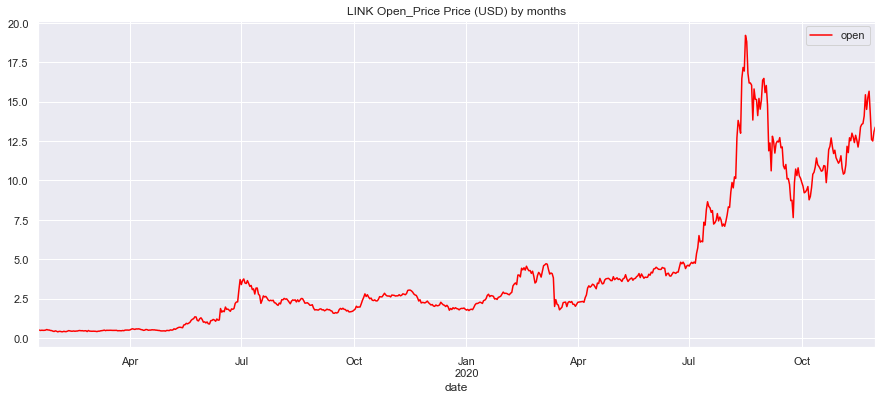

In [65]:
#using a throwaway variable to plot the opening price plot
_ = data.plot(figsize=(15,6), color='red', title='LINK Open_Price Price (USD) by months')

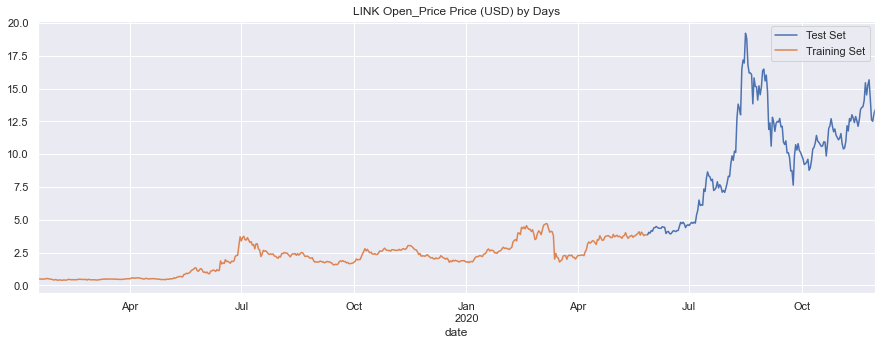

In [66]:
#using outer join to get a visual of training and testing data
_ = data_test \
    .rename(columns={'open': 'Test Set'}) \
    .join(data_train.rename(columns={'open': 'Training Set'}), how='outer') \
    .plot(figsize=(15,5), title='LINK Open_Price Price (USD) by Days', style='')

In [67]:
#importing keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Activation


model = Sequential()
model.add(LSTM(128,activation="sigmoid",input_shape=(1,1)))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=100, batch_size=60, verbose=2)

Epoch 1/100
 - 1s - loss: 0.1160
Epoch 2/100
 - 0s - loss: 0.1061
Epoch 3/100
 - 0s - loss: 0.1126
Epoch 4/100
 - 0s - loss: 0.1001
Epoch 5/100
 - 0s - loss: 0.0969
Epoch 6/100
 - 0s - loss: 0.0995
Epoch 7/100
 - 0s - loss: 0.0936
Epoch 8/100
 - 0s - loss: 0.0992
Epoch 9/100
 - 0s - loss: 0.0858
Epoch 10/100
 - 0s - loss: 0.0841
Epoch 11/100
 - 0s - loss: 0.0868
Epoch 12/100
 - 0s - loss: 0.0840
Epoch 13/100
 - 0s - loss: 0.0754
Epoch 14/100
 - 0s - loss: 0.0775
Epoch 15/100
 - 0s - loss: 0.0772
Epoch 16/100
 - 0s - loss: 0.0690
Epoch 17/100
 - 0s - loss: 0.0710
Epoch 18/100
 - 0s - loss: 0.0686
Epoch 19/100
 - 0s - loss: 0.0617
Epoch 20/100
 - 0s - loss: 0.0576
Epoch 21/100
 - 0s - loss: 0.0689
Epoch 22/100
 - 0s - loss: 0.0600
Epoch 23/100
 - 0s - loss: 0.0595
Epoch 24/100
 - 0s - loss: 0.0607
Epoch 25/100
 - 0s - loss: 0.0575
Epoch 26/100
 - 0s - loss: 0.0575
Epoch 27/100
 - 0s - loss: 0.0572
Epoch 28/100
 - 0s - loss: 0.0608
Epoch 29/100
 - 0s - loss: 0.0542
Epoch 30/100
 - 0s - lo

In [68]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 66,689
Trainable params: 66,689
Non-trainable params: 0
_________________________________________________________________


In [69]:
#making the predictions
test_set = data_test.values
inputs = np.reshape(test_set, (len(test_set), 1))
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
predicted_LINK_price = model.predict(inputs)
predicted_LINK_price = sc.inverse_transform(predicted_LINK_price)

In [70]:
data_test['Open_Price_Prediction'] = predicted_LINK_price
data_all = pd.concat([data_test, data_train], sort=False)

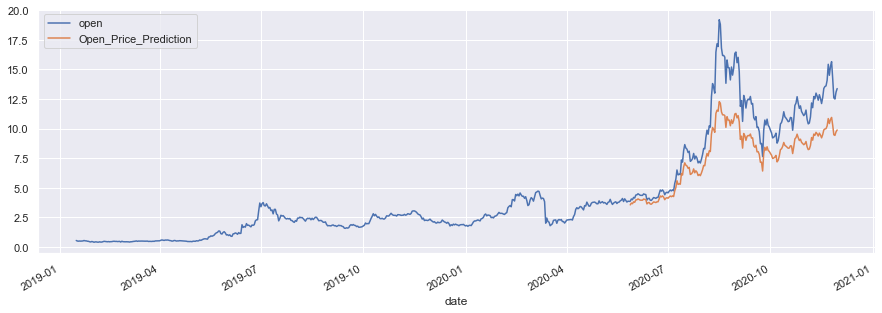

In [72]:
_ = data_all[['open','Open_Price_Prediction']].plot(figsize=(15, 5))

In [73]:
#calculate MSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(data_test['open'],data_test['Open_Price_Prediction'])

7.101183389730057

In [74]:
mean_absolute_error(y_true=data_test['open'],
                   y_pred=data_test['Open_Price_Prediction'])

2.2211038760282134